In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
fn = "../output/wikipedia_metrics.csv"
df = pd.read_csv(fn)

In [3]:
df.head()

,title,edits,size,users
0,50_Cent,13066,518204129,4557
1,Adele,6725,456912673,2672
2,Angelina_Jolie,7336,531496219,2902
3,Backstreet_Boys,10270,412497115,4050
4,Ben_Affleck,9263,906521569,3655


In [4]:
# Make scatterplot showing relationship between 
# no of edits vs no of users
# define x and y variables
x = df["users"]
y = df["edits"]

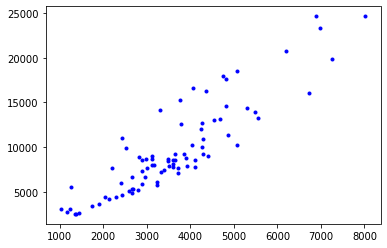

In [13]:
# plot x vs y 
plt.plot(x, y, color = 'b', marker='.', linestyle='')

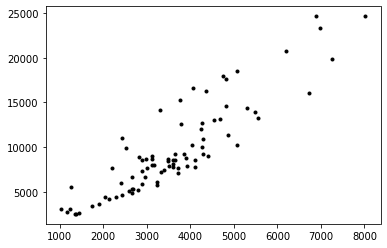

In [14]:
plt.plot(x,y, c='k', marker='.', ls='')

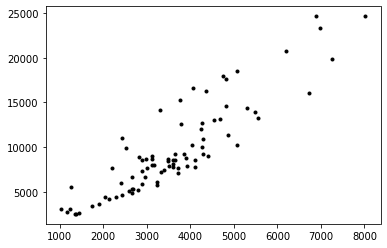

In [15]:
plt.plot(x, y, 'k.')

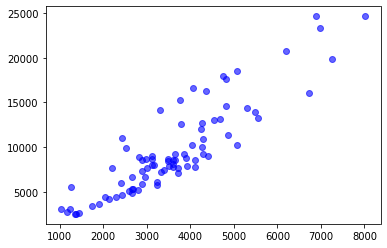

In [16]:
plt.plot(x,y, c='b', marker='o', alpha=0.6, ls='')

Text(0.5, 1.0, "Forbes 100 Celebrities' Wikipedia Page")

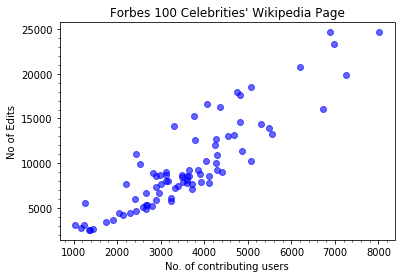

In [18]:
plt.plot(x,y, c='b', marker='o', alpha=0.6, ls='')
# adding labels
plt.xlabel("No. of contributing users")
plt.ylabel("No of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Page")

In [20]:
# quantifying the relationship using mean ratio
mean_ratio = np.mean(y/x)
mean_ratio

2.609397656944558

In [31]:
# Overlay in plot the line: y = mean_ratio * x
xx = np.linspace(800, 8400, 1000)
yy = mean_ratio * xx

In [32]:
xx

array([ 800.        ,  807.60760761,  815.21521522,  822.82282282,
        830.43043043,  838.03803804,  845.64564565,  853.25325325,
        860.86086086,  868.46846847,  876.07607608,  883.68368368,
        891.29129129,  898.8988989 ,  906.50650651,  914.11411411,
        921.72172172,  929.32932933,  936.93693694,  944.54454454,
        952.15215215,  959.75975976,  967.36736737,  974.97497497,
        982.58258258,  990.19019019,  997.7977978 , 1005.40540541,
       1013.01301301, 1020.62062062, 1028.22822823, 1035.83583584,
       1043.44344344, 1051.05105105, 1058.65865866, 1066.26626627,
       1073.87387387, 1081.48148148, 1089.08908909, 1096.6966967 ,
       1104.3043043 , 1111.91191191, 1119.51951952, 1127.12712713,
       1134.73473473, 1142.34234234, 1149.94994995, 1157.55755756,
       1165.16516517, 1172.77277277, 1180.38038038, 1187.98798799,
       1195.5955956 , 1203.2032032 , 1210.81081081, 1218.41841842,
       1226.02602603, 1233.63363363, 1241.24124124, 1248.84884

In [33]:
yy

array([ 2087.51812556,  2107.36939902,  2127.22067249,  2147.07194595,
        2166.92321942,  2186.77449289,  2206.62576635,  2226.47703982,
        2246.32831329,  2266.17958675,  2286.03086022,  2305.88213368,
        2325.73340715,  2345.58468062,  2365.43595408,  2385.28722755,
        2405.13850102,  2424.98977448,  2444.84104795,  2464.69232141,
        2484.54359488,  2504.39486835,  2524.24614181,  2544.09741528,
        2563.94868875,  2583.79996221,  2603.65123568,  2623.50250914,
        2643.35378261,  2663.20505608,  2683.05632954,  2702.90760301,
        2722.75887648,  2742.61014994,  2762.46142341,  2782.31269687,
        2802.16397034,  2822.01524381,  2841.86651727,  2861.71779074,
        2881.56906421,  2901.42033767,  2921.27161114,  2941.1228846 ,
        2960.97415807,  2980.82543154,  3000.676705  ,  3020.52797847,
        3040.37925194,  3060.2305254 ,  3080.08179887,  3099.93307233,
        3119.7843458 ,  3139.63561927,  3159.48689273,  3179.3381662 ,
      

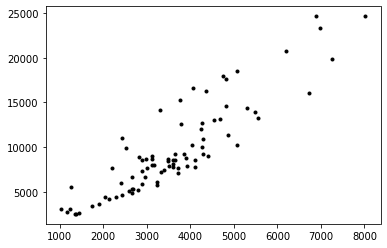

In [34]:
plt.plot(x,y,'k.')

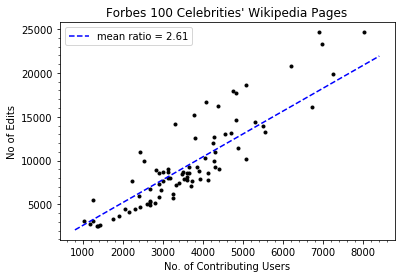

In [35]:
plt.plot(x,y,'k.')
plt.plot(xx, yy, 'b--', label="mean ratio = %.2f" % mean_ratio)

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")
plt.legend(loc="upper left", numpoints=1)

In [36]:
# Quantify the relationship using
# linear regression fit: y vs (x-mean(x))
x_mean = np.mean(x)
x_mean

3604.2073170731705

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x-x_mean,y)

In [40]:
slope, intercept

(3.17979447002623, 9626.134146341463)

In [41]:
r_value, p_value, std_err

(0.8905379922596317, 4.2851570848775055e-29, 0.18160425239314257)

In [42]:
# overlay in plot the linear regression fit
# y = slope * (x - x_mean) + intercept
xx_fit = xx - x_mean

In [43]:
yy_fit = slope * xx_fit + intercept

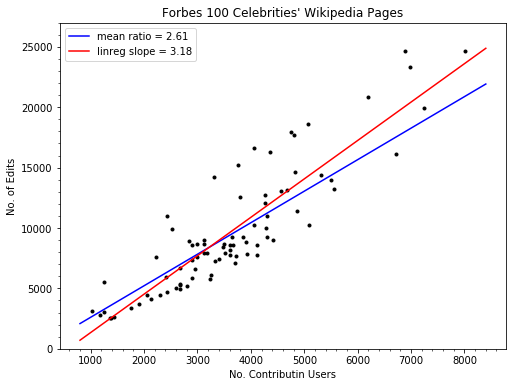

In [47]:
plt.figure(figsize=(8,6))
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b-', label = "mean ratio = %.2f" % mean_ratio)
plt.plot(xx, yy_fit, 'r-', label="linreg slope = %.2f" % slope)

# add axis labels
plt.xlabel("No. Contributin Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")
plt.legend(loc="upper left", numpoints=1)
plt.ylim((0, 27000))

# save to png file
plt.savefig("../fig/fig_wikipedia_users_vs_no_of_edits.png")
